<a href="https://colab.research.google.com/github/nazlicanalagoz/DataScience_Uni/blob/main/proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nazlıcan ALAGÖZ - B180200057 - Matematik

***Proje Adı***: Matematik çalışma kitaplarını kullanmak öğrencilerin öğrenmesini geliştirir mi?

***Neden ve Amaç*** : Batı Afrika ülkelerinde öğrencilerin matematik alanında bilgileri nasıl ve nasıl etkileniyorlar? Deneme yanılma yöntemiyle belli bir süreçte incelenmiştir.

In [52]:
import numpy as np    #vektörel ve matris işlemleri    
import pandas as pd   #dataframe manipülasyon işlemleri
import seaborn as sns   #görselleştirme
import matplotlib.pyplot as plt   #görselleştirme
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

**VERİ ÖN İŞLEME**

In [53]:
data = pd.read_excel("/content/data.xlsx")  # Verilerimizi excelden çektik
data

,Dönem,Grade 4 Group,Grade 5 Group,Grade 6 Group
0,Ortalama Test Puanı,17.1,23.9,27.5
1,Standart Sapma,13.0,12.9,12.5
2,Kızların Sayısı,120.0,95.0,129.0
3,Erkeklerin Sayısı,116.0,119.0,135.0
4,Ortalama Test Puanı 1,20.7,28.4,29.7
5,Standart Sapma 1,13.6,12.0,11.3
6,Kızların Sayısı 1,120.0,95.0,129.0
7,Erkeklerin Sayısı 1,116.0,119.0,135.0
8,Ortalama Test Puanı 2,30.6,33.0,34.6
9,Standart Sapma 2,11.7,10.4,10.4


*  Dönem kısmı, 
  - Hazırlık
  - Orta
  - Bitiş    olarak alınmıştır. Ve her birinde ortalama test puanlarına, standart sapmaya, kızların ve erkeklerin sayısına bakılmıştır.

In [54]:
# Eksik değer var mı?
data.isnull().sum()

Dönem            0
Grade 4 Group    0
Grade 5 Group    0
Grade 6 Group    0
dtype: int64

In [55]:
# Özniteliklerin veri türleri, içerdikleri kayıt sayıları ve bellek kullanımı hakkında bilgi edinme
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dönem          12 non-null     object 
 1   Grade 4 Group  12 non-null     float64
 2   Grade 5 Group  12 non-null     float64
 3   Grade 6 Group  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [56]:
# Satır ve sütun (öznitelik) sayısını görüntüleme
data.shape

(12, 4)

*  Veri setinde 14 adet farklı değişken, 4 gözlem vardır.
*  Kayıp değer bulunmamaktadır.

In [57]:
# Rastgele 4 kaydı verdi
data.sample(4)

,Dönem,Grade 4 Group,Grade 5 Group,Grade 6 Group
3,Erkeklerin Sayısı,116.0,119.0,135.0
0,Ortalama Test Puanı,17.1,23.9,27.5
1,Standart Sapma,13.0,12.9,12.5
5,Standart Sapma 1,13.6,12.0,11.3


In [58]:
#Gözlemlerimizde kaç adet değişken var?
data.count()

Dönem            12
Grade 4 Group    12
Grade 5 Group    12
Grade 6 Group    12
dtype: int64

In [59]:
# Değişkenlerimizden orta dönemdeki verilerini alalım
data[4:8]

,Dönem,Grade 4 Group,Grade 5 Group,Grade 6 Group
4,Ortalama Test Puanı 1,20.7,28.4,29.7
5,Standart Sapma 1,13.6,12.0,11.3
6,Kızların Sayısı 1,120.0,95.0,129.0
7,Erkeklerin Sayısı 1,116.0,119.0,135.0


In [60]:
# 5.sınıf verilerinin bir dönemini en çoktan en aza sıralayalım
data['Grade 5 Group'][:4].sort_values(axis=0, ascending=False)

3    119.0
2     95.0
0     23.9
1     12.9
Name: Grade 5 Group, dtype: float64

**İSTATİSTİKSEL İŞLEMLER**

In [61]:
# Sadece sayısal değerlerin istatistiksel işlemlerini yaptı
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Grade 4 Group,12.0,67.891667,52.574423,11.7,16.225,73.3,117.0,120.0
Grade 5 Group,12.0,63.550000,46.690577,10.4,21.150,64.0,101.0,119.0
Grade 6 Group,12.0,76.500000,58.464130,10.4,23.750,81.8,130.5,135.0


In [62]:
data.corr() # Korelasyon

,Grade 4 Group,Grade 5 Group,Grade 6 Group
Grade 4 Group,1.000000,0.973881,0.996043
Grade 5 Group,0.973881,1.000000,0.988067
Grade 6 Group,0.996043,0.988067,1.000000


*  4. Sınıf verimi 5. sınıfa geçerken düşmüş.
* 5. Sınıf verimi 6.sınıfa geçerken düşmüş fakat 4.sınıfa kıyasla yüksek.

In [63]:
# Her dönemde katılan toplam kişi sayısını bulalım  (Her 3 dönemde de kişi sayısı aynıdır.)
df = data['Grade 4 Group'][2:4] + data['Grade 5 Group'][2:4] + data['Grade 6 Group'][2:4]
df[2]+ df[3]

714.0

In [64]:
# 4.Sınıfta değerlerin 100 den az ve 6.sınıfta değerlerin 10 dan fazla olduğu verileri alalım
data[(data['Grade 4 Group']<100.0) & (data['Grade 6 Group']>10.0)]

,Dönem,Grade 4 Group,Grade 5 Group,Grade 6 Group
0,Ortalama Test Puanı,17.1,23.9,27.5
1,Standart Sapma,13.0,12.9,12.5
4,Ortalama Test Puanı 1,20.7,28.4,29.7
5,Standart Sapma 1,13.6,12.0,11.3
8,Ortalama Test Puanı 2,30.6,33.0,34.6
9,Standart Sapma 2,11.7,10.4,10.4


**VERİ GÖRSELLEŞTİRME**

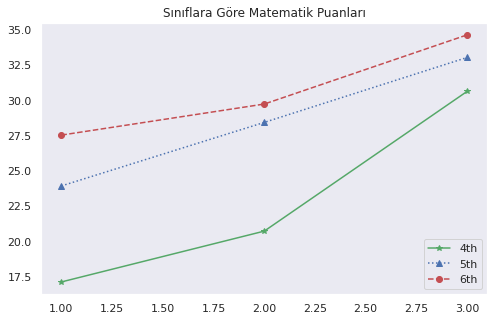

In [65]:
a=np.arange(1,4)      # Elimizdeki veri sayısı kadar böldü
x=[17.1,20.7,30.6]
y=[23.9,28.4,33.0]
z=[27.5,29.7,34.6]
plt.subplots(figsize=(8,5))  # Grafiğin boyutunu 8x5 yaptı
plt.title("Sınıflara Göre Matematik Puanları")     # Grafiğin Adını verdik
plt.plot(a,x,"g",marker='*',label='4th')
plt.plot(a,y,'b:',marker='^',label='5th')
plt.plot(a,z,'r--',marker='o',label='6th')
plt.legend(loc="lower right")  # Labelları sağ alta yazdı
plt.grid()  # Grafiğin arkasını kare yaptı

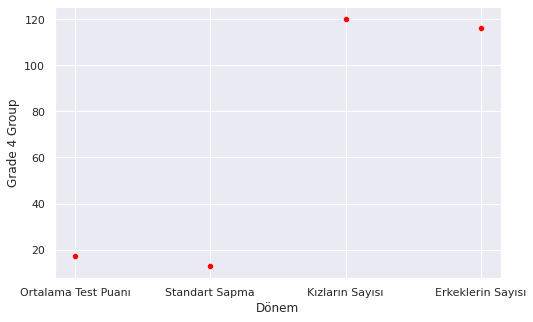

In [66]:
sns.set(rc={'figure.figsize':(8,5)})  # grafiği 8x5 boyutunda alır

sns.scatterplot(x='Dönem', y='Grade 4 Group',data=data[:4],color='red')   # saçılım grafiğinde 4.sınıfın Hazırlık döneminin verileri gösterildi

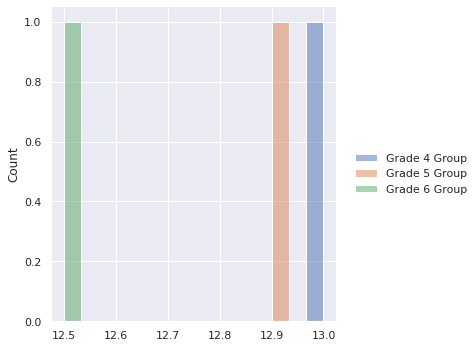

In [67]:
# Hazırlık döneminin Standart sapmalarını gösterdik ( Histogram )
sns.displot(data[1:2], bins=15, color='purple') # normal dağılım

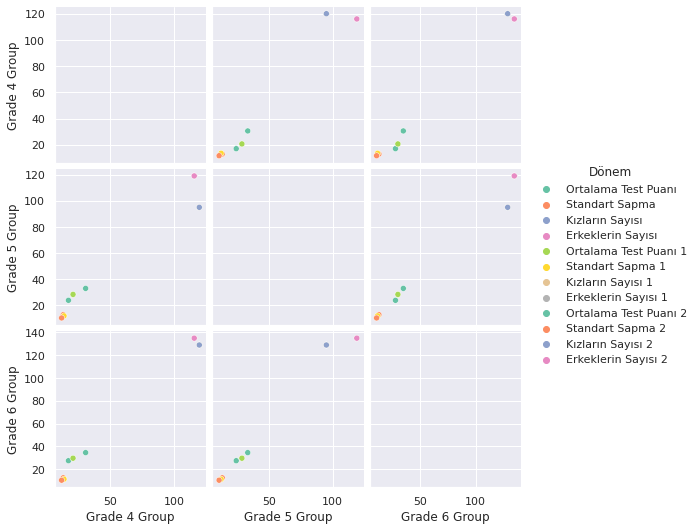

In [68]:
sns.pairplot(data, hue='Dönem',palette='Set2')   # sayısal sütunlar için çift yönlü ilişkiye baktık

**MODEL OLUŞTURMA**

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [70]:
data

,Dönem,Grade 4 Group,Grade 5 Group,Grade 6 Group
0,Ortalama Test Puanı,17.1,23.9,27.5
1,Standart Sapma,13.0,12.9,12.5
2,Kızların Sayısı,120.0,95.0,129.0
3,Erkeklerin Sayısı,116.0,119.0,135.0
4,Ortalama Test Puanı 1,20.7,28.4,29.7
5,Standart Sapma 1,13.6,12.0,11.3
6,Kızların Sayısı 1,120.0,95.0,129.0
7,Erkeklerin Sayısı 1,116.0,119.0,135.0
8,Ortalama Test Puanı 2,30.6,33.0,34.6
9,Standart Sapma 2,11.7,10.4,10.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 124.43)

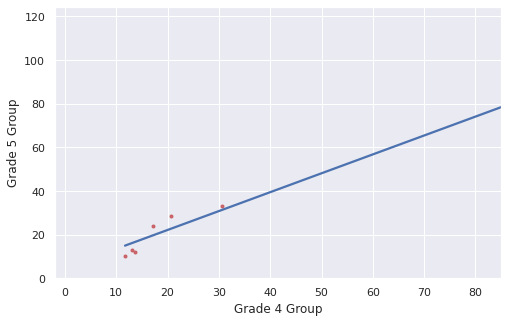

In [71]:
# İki özniteliğimizi inceyelerek aykırı değer olup olmadığına baktık.
g = sns.regplot(data['Grade 4 Group'],data['Grade 5 Group'],ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85) 
plt.ylim(bottom=0)

In [72]:
x1 = data['Grade 4 Group']
y1 = data['Grade 5 Group']
#bağımlı ve bağımsız değişkeni seçme işlemi yapıyoruz.
reg = LinearRegression()

x1_egitim, x1_test, y1_egitim, y1_test = train_test_split(x1,y1,test_size=0.2, random_state=2)     # eğitim ve test olarak böldük
model = reg.fit(x1.values.reshape(-1,1),y1.values.reshape(-1,1))  #Scikit-Learn modülü içerisinde bulunan LinearRegression fonksiyonu ile modeli oluşturup daha sonra seçmiş
#olduğumuz değişkenler ile bu modeli eğitiyoruz.

In [73]:
 print(model.score(x1.values.reshape(-1,1),y1.values.reshape(-1,1)),"\n")  # doğruluk değerlerine baktık

0.9484441652541944 



In [76]:
x1_test = (model.predict(x1.values.reshape(-1,1)))
x1_test      # 4.sınıfın 5.sınıf değeri üzerindeki etkisini tahmin etme işlemi

array([[ 19.62082182],
       [ 16.07477495],
       [108.61794933],
       [105.15839141],
       [ 22.73442395],
       [ 16.59370864],
       [108.61794933],
       [105.15839141],
       [ 31.2968298 ],
       [ 14.95041863],
       [108.61794933],
       [105.15839141]])

In [79]:
r2_score(x1,x1_test)     # Performans ölçümü 

0.974305497687835

In [80]:
mean_squared_error(x1,x1_test, squared=False)  # Tahmin/ test hatalarının standart sapması

8.068639970351056